# Определение перспективного тарифа для телеком компании

______________________

##### В данном исследовании представлены несколько таблиц с информации о тарифах, разговорах, интернет-траффике  данных пользователей.
______

##### Шаг 1. Изучение общей информации
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек, проверка дубликатов](#section1)

##### Шаг 2. Подготовка данных
* [1. Приведение данных к нужным типам, исправление ошибок в данных](#section2)
* [2. Подсчет количества звонков, минут разговора, сообщений, объема интернет-трафика по месяцам](#section3)
* [3. Подсчет помесячной выручки с каждого пользователя](#section4)

##### Шаг 3. Анализ данных
* [1. Расчет среднего, дисперсии, стандартного отклонения](#section5)
* [2. Построение распределений](#section6)

##### Шаг 4. Проверка гипотез
* [1. Проверка гипотезы о средней выручке тарифов](#section7)
* [2. Проверка гипотезы о средней выручке Москвы и регионов](#section8)

##### Шаг 5. Общий вывод
* [Выводы и рекомендации](#section7)


В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем поведение клиентов и сделаем вывод — какой тариф лучше и приносит больше денег.

#### Описание тарифов
##### Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* *минута разговора: 3 рубля*
* *сообщение: 3 рубля*
* *1 Гб интернет-трафика: 200 рублей*

##### Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
* *минута разговора: 1 рубль*
* *сообщение: 1 рубль*
* *1 Гб интернет-трафика: 150 рублей*

### Шаг 1. Изучение общей информации <a id='section1'></a>

In [1]:
# Иммпортируем библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# Читаем информацию о звонках:
# id — уникальный номер звонка
# call_date — дата звонка
# duration — длительность звонка в минутах
# user_id — идентификатор пользователя, сделавшего звонок
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
#Смотрим информацию о данных и проверяем дубликаты
data_calls.info()
data_calls.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


0

In [5]:
#Находим количество звонков с нулевым значением
len(data_calls.query('duration == 0'))

39613

In [6]:
#Находим количество пользователей в информации о звонках
len(data_calls['user_id'].value_counts())

492

In [7]:
 # посмотрим количество самых минимальных значений
data_calls['duration'].value_counts().sort_index().head(5)

0.00    39613
0.01      101
0.02       84
0.03       80
0.04       85
Name: duration, dtype: int64

In [8]:
# Читаем информацию об интернет-сессиях:
# id — уникальный номер сессии
# mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
# session_date — дата интернет-сессии
# user_id — идентификатор пользователя
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
#Смотрим информацию о данных и проверяем дубликаты
data_internet.info()
data_internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


0

In [10]:
#Находим количество пользователей в информации о интернете
len(data_internet['user_id'].value_counts())

497

In [11]:
# Читаем информацию о сообщениях:
# id — уникальный номер сообщения
# message_date — дата сообщения
# user_id — идентификатор пользователя, отправившего сообщение
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
#Смотрим информацию о данных и проверяем дубликаты
data_messages.info()
data_messages.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


0

In [13]:
#Находим количество пользователей в информации о сообщениях
len(data_messages['user_id'].value_counts())

426

In [14]:
# Читаем информацию о тарифах:
# tariff_name — название тарифа
# rub_monthly_fee — ежемесячная абонентская плата в рублях
# minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
# messages_included — количество сообщений в месяц, включённых в абонентскую плату
# mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
# rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, 
# то со 101 минуты будет взиматься плата)
# rub_per_message — стоимость отправки сообщения сверх тарифного пакета
# rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
#Смотрим информацию о данных
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [16]:
# Таблица users (информация о пользователях):
# user_id — уникальный идентификатор пользователя
# first_name — имя пользователя
# last_name — фамилия пользователя
# age — возраст пользователя (годы)
# reg_date — дата подключения тарифа (день, месяц, год)
# churn_date — дата прекращения пользования тарифом 
# city — город проживания пользователя
# tariff — название тарифного плана
data_users = pd.read_csv('/datasets/users.csv')
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [17]:
data_users.info()
data_users.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

#### Вывод
В таблице по звонкам известна информация по 492 абонентам. Значения в столбце с датой будем переводить в тип даты. Так как в тарифах "Мегалайн" засчитывается целая минута, если пользователь проговорил всего 1 секунду, то значения в столбце с количеством минут будем округлять вверх и переводить в целые числа. Так же много нулевых значений, возможно это пропущенные звонки, данный тип звонков не учитывается при индексации. В таблице с информацией об интернет-сессиях известна информация по 497 абонентам. Значения в столбце с датой будем переводить в тип даты. Так как в тарифах "Мегалайн" засчитывается целый мегабайт, то значения в столбце с количеством потраченных мегабайт будем округлять вверх, переводить в гигабайты и переводить в целые числа. Также в данной таблице есть столбец Unnamed: 0, который дублирует индексы. В таблице с сообщениями известна информация по 426 пользователям. Значения в столбце с датой будем переводить в тип даты. Тип данных значений в столбце с сообщениями переведем в целочисленный тип и переименуем столбец в 'messages'. В таблице с тарифами переименуем столбец в 'tariff'. Значения в столбце с количеством бесплатных мегабайтов будем переводить в гигабайты и переименуем в 'gb_per_month_included'. В таблице с пользователями есть пропущенные значения в столбце с датой прекращения пользования тарифом, это означает, согласно пояснению к данным, что тариф ещё действовал на момент выгрузки данных. Так как мы рассматриваем информацию за год, то, если понадобится, пропуски можно заполнить 31.12.2018 года.

### Шаг 2. Подготовка данных <a id='section2'></a>

In [18]:
# Переименовываем столбцы
data_messages.rename(columns={'id': 'messages'}, inplace=True)
data_messages.head(3)

,messages,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [19]:
# Переименовываем столбцы и переводим Гб в Мб
data_tariffs.rename(columns={'tariff_name': 'tariff', 'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
data_tariffs['gb_per_month_included'] = data_tariffs['gb_per_month_included'] / 1024
data_tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [20]:
# Округляем значения использованных минут вверх
data_calls['duration'] = data_calls['duration'].apply(lambda x: mt.ceil(x)).astype('int')
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [21]:
# Округляем значения использованных гигабайт вверх
data_internet['gb_used'] = data_internet['mb_used'].apply(lambda x: mt.ceil(x / 1024)).astype('int')
del(data_internet['Unnamed: 0'])
data_internet.head()

,id,mb_used,session_date,user_id,gb_used
0,1000_0,112.95,2018-11-25,1000,1
1,1000_1,1052.81,2018-09-07,1000,2
2,1000_2,1197.26,2018-06-25,1000,2
3,1000_3,550.27,2018-08-22,1000,1
4,1000_4,302.56,2018-09-24,1000,1


In [22]:
# Переводим в формат даты и находим месяц совершения звонка
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['month'] = data_calls['call_date'].dt.month
data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [23]:
# Переводим в формат даты и находим месяц для сообщения
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].dt.month
data_messages.head()

,messages,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [24]:
# Перевод в формат даты и находим месяц интернет-сессии
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month
data_internet.head()

,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,112.95,2018-11-25,1000,1,11
1,1000_1,1052.81,2018-09-07,1000,2,9
2,1000_2,1197.26,2018-06-25,1000,2,6
3,1000_3,550.27,2018-08-22,1000,1,8
4,1000_4,302.56,2018-09-24,1000,1,9


<a id='section3'></a>

In [25]:
# Находим количество сделанных звонков по месяцам для каждого пользователя
data_calls_per_month = (
    data_calls
    .pivot_table(index=['user_id', 'month'], values='duration', aggfunc='count', fill_value=0)
    
)
data_calls_per_month

duration
user_id month          
1000    5            22
        6            43
        7            47
        8            52
        9            58
...                 ...
1498    10           41
1499    9             9
        10           68
        11           74
        12           69

[3174 rows x 1 columns]

In [26]:
# Находим количество израсходованных минут разговора по месяцам для каждого пользователя
data_min_per_month = (
    data_calls
    .pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum', fill_value=0)
    
)
data_min_per_month.head()

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466

In [27]:
# Количество отправленных сообщений по месяцам для каждого пользователя
data_messages_per_month = (
    data_messages
    .pivot_table(index=['user_id', 'month'], values='messages', aggfunc='count', fill_value=0)
)
data_messages_per_month.head()

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

In [28]:
# Находим объем израсходованного интернет-трафика по месяцам для каждого пользователя
data_gb_per_month = (
    data_internet
    .pivot_table(index=['user_id', 'month'], values='gb_used', aggfunc='sum', fill_value=0)
    
)
data_gb_per_month.head()

gb_used
user_id month         
1000    5            4
        6           49
        7           28
        8           27
        9           26

In [29]:
# Соединяем данные по использованным абонентами звонкам, сообщениям и Гб интернета
# Устанавливаем одинарный индекс по пользователям
data_per_month = data_min_per_month.join(data_messages_per_month, how='outer').join(data_gb_per_month, how='outer')
data_per_month.reset_index(level=['month'], inplace=True)
data_per_month.head()

,month,duration,messages,gb_used
user_id,,,,
1000,5,159.0,22.0,4.0
1000,6,172.0,60.0,49.0
1000,7,340.0,75.0,28.0
1000,8,408.0,81.0,27.0
1000,9,466.0,57.0,26.0


In [30]:
# Начальные данные по звонкам, сообщениям и интернету не совпадали по количеству, по итогу объединения появились пропуски
data_per_month.isna().sum()

month         0
duration     40
messages    497
gb_used      11
dtype: int64

In [31]:
# Заполняем пропущенные значения нулями, так как в данные месяцы абоненты не использовали звонки, сообщения и Гб
data_per_month.fillna(0, inplace=True)
data_per_month.isna().sum()

month       0
duration    0
messages    0
gb_used     0
dtype: int64

In [32]:
# Соединяем данные по пользователям с данными по тарифам
# Устанавливаем одинарный индекс по пользователям
data_users_full = data_users.merge(data_tariffs, on='tariff')

data_users_full = data_users_full.set_index('user_id')
data_users_full.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
user_id,,,,,,,,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1
1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30.0,3000,1950,150,1,1
1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30.0,3000,1950,150,1,1
1013,36,NaN,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30.0,3000,1950,150,1,1
1016,58,NaN,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30.0,3000,1950,150,1,1


In [33]:
# Соединяем данные по пользователям с данные по звонкам, сообщениям и интернету
data_full = data_users_full.join(data_per_month, on='user_id', how='outer') 
data_full.head()

,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,duration,messages,gb_used
user_id,,,,,,,,,,,,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,5.0,159.0,22.0,4.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,6.0,172.0,60.0,49.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,7.0,340.0,75.0,28.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,8.0,408.0,81.0,27.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,9.0,466.0,57.0,26.0


In [34]:
# Начальные данные по звонкам, сообщениям и интернету не совпадали по количеству, по итогу объединения появились пропуски

data_full.isna().sum()

age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
month                       2
duration                    2
messages                    2
gb_used                     2
dtype: int64

In [35]:
# Заполняем пропущенные значения нулями, так как в данные месяцы некоторые абоненты не использовали звонки, сообщения и Гб
data_full['duration'].fillna(0, inplace=True)
data_full['messages'].fillna(0, inplace=True)
data_full['gb_used'].fillna(0, inplace=True)
data_full.dropna(subset = ['month'], inplace = True)
data_full['month'] = data_full['month'].astype('int')
data_full.isna().sum()

age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
month                       0
duration                    0
messages                    0
gb_used                     0
dtype: int64

<a id='section4'></a>

In [36]:
# Посчитаем помесячную выручку с каждого пользователя, 
# для этого находим перерасход по количеству звонков, сообщений и интернет-трафика 
# Мпромежуточные отрицательные значения заполняем нулями

data_full['gb_over'] = data_full['gb_used'] - data_full['gb_per_month_included']
data_full['gb_over'].where(data_full['gb_over'] > 0, 0, inplace=True)
data_full['min_over'] = data_full['duration'] - data_full['minutes_included']
data_full['min_over'].where(data_full['min_over'] > 0, 0, inplace=True)
data_full['messages_over'] = data_full['messages'] - data_full['messages_included']
data_full['messages_over'].where(data_full['messages_over'] > 0, 0, inplace=True)

data_full.head(3)

,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,duration,messages,gb_used,gb_over,min_over,messages_over
user_id,,,,,,,,,,,,,,,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,5,159.0,22.0,4.0,0.0,0.0,0.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,6,172.0,60.0,49.0,19.0,0.0,0.0
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,7,340.0,75.0,28.0,0.0,0.0,0.0


In [37]:
# Умножаем перерасход на цены за минуты, сообщения и Гб из тарифного плана и
# Прибавляем абонентскую плату, соответствующую тарифному плану
# Формируем таблицу по пользователям

data_full['income'] = (data_full['rub_monthly_fee'] +
    (data_full['gb_over'] * data_full['rub_per_gb']) + 
    (data_full['min_over'] * data_full['rub_per_minute']) +
    (data_full['messages_over'] * data_full['rub_per_message'])
)

data_income = data_full.pivot_table(index=['user_id', 'month', 'tariff'], values='income')
data_income.head()

income
user_id month tariff        
1000    5     ultra   1950.0
        6     ultra   4800.0
        7     ultra   1950.0
        8     ultra   1950.0
        9     ultra   1950.0

#### Вывод 
Переименовали необходимые столбцы. Сформировали данные по использованным абонентами звонкам, сообщениям и Гб интернета за месяц и соединили их с данными по пользователям и тарифам. Посчитали помесячную выручку с каждого пользователя. 


### Шаг 3. Анализ данных <a id='section5'></a>

In [38]:
# Формируем таблицу со средними значениями количества минут, сообщений, Гб и дохода для тарифа «Ультра» по месяцам
data_ultra_mean = (
    data_full
    .query('tariff == "ultra"')
    .pivot_table(index=['tariff', 'month'], values=['duration', 'messages', 'gb_used', 'income'], aggfunc='mean')
    .astype('int')
)
data_ultra_mean

duration  gb_used  income  messages
tariff month                                     
ultra  1           428       27    2566        33
       2           297       23    2918        21
       3           489       34    3713        32
       4           458       33    3381        31
       5           510       38    3803        37
       6           479       37    3678        41
       7           545       40    3989        49
       8           510       38    3870        48
       9           539       37    3766        52
       10          558       39    3884        58
       11          541       38    3859        55
       12          592       42    4324        60

In [39]:
# Формируем таблицу со средними значениями количества минут, сообщений, Гб и дохода для тарифа «Смарт» по месяцам
data_smart_mean = (
    data_full
    .query('tariff == "smart"')
    .pivot_table(index=['tariff', 'month'], values=['duration', 'messages', 'gb_used', 'income'], aggfunc='mean')
    .astype('int')
)
data_smart_mean

duration  gb_used  income  messages
tariff month                                     
smart  1           203       21    2515        18
       2           298       29    3879        24
       3           390       39    5702        31
       4           367       35    4884        30
       5           387       41    6001        33
       6           395       41    5945        33
       7           408       41    6063        33
       8           421       43    6408        33
       9           428       42    6290        33
       10          426       43    6526        33
       11          435       44    6615        34
       12          478       47    7231        35

In [40]:
# Находим дисперсию для количества минут, сообщений, Гб и дохода для тарифа «Ультра»
variance_ultra = np.var(data_ultra_mean, ddof=1)
variance_ultra

duration      5975.545455
gb_used         30.454545
income      230972.083333
messages       153.537879
dtype: float64

In [41]:
# Находим дисперсию для количества минут, сообщений, Гб и дохода для тарифа «Смарт»
variance_smart = np.var(data_smart_mean, ddof=1)
variance_smart

duration    5.238970e+03
gb_used     5.287879e+01
income      1.737423e+06
messages    2.433333e+01
dtype: float64

In [42]:
# Находим стандартное отклонение для количества минут, сообщений, Гб и дохода для тарифа «Ультра»
standard_deviation_ultra = np.std(data_ultra_mean, ddof=1)
standard_deviation_ultra

duration     77.301652
gb_used       5.518564
income      480.595551
messages     12.391040
dtype: float64

In [43]:
# Находим стандартное отклонение для количества минут, сообщений, Гб и дохода для тарифа «Смарт»
standard_deviation_smart = np.std(data_smart_mean, ddof=1)
standard_deviation_smart

duration      72.380727
gb_used        7.271780
income      1318.113560
messages       4.932883
dtype: float64

In [44]:
# Находим среднее для количества минут, сообщений, Гб и дохода для тарифа «Ультра»
mean_income_ultra = np.mean(data_ultra_mean)
mean_income_ultra

duration     495.500000
gb_used       35.500000
income      3645.916667
messages      43.083333
dtype: float64

In [45]:
# Находим среднее для количества минут, сообщений, Гб и дохода для тарифа «Смарт»
mean_income_smart = np.mean(data_smart_mean)
mean_income_smart

duration     386.333333
gb_used       38.833333
income      5671.583333
messages      30.833333
dtype: float64

<a id='section6'></a>

In [46]:
# Создаем функцию для построения диаграммы, которая принимает на вход столбец таблицы, название оси и название гистограммы
def histogram(data, x_label, title):
    plt.xlabel(x_label)
    plt.title(title)
    Q1 = data.describe()['25%']
    Q3 = data.describe()['75%']
    IQR = Q3 - Q1
    a = Q1-2*IQR
    b = Q3+2*IQR
    data.hist(bins=len(data), range=(a, b), alpha=0.5, figsize=(10, 5)) 

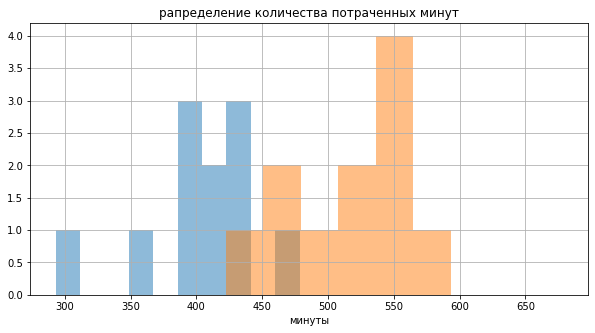

In [47]:
# Гистограмма для количества потраченных минут для тарифов «Смарт» и «Ультра»
histogram(data_smart_mean['duration'], 'минуты', 'рапределение количества потраченных минут')
histogram(data_ultra_mean['duration'], 'минуты', 'рапределение количества потраченных минут')

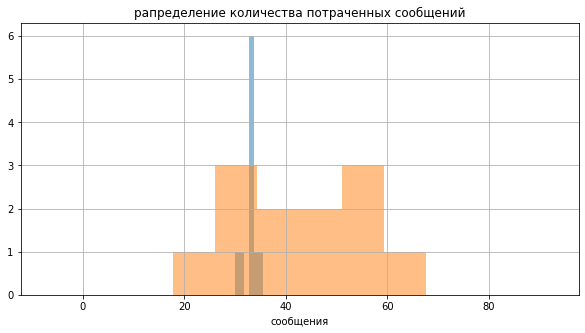

In [48]:
# Гистограмма для количества потраченных сообщений для тарифов «Смарт» и «Ультра»
histogram(data_smart_mean['messages'], 'сообщения', 'рапределение количества потраченных сообщений')
histogram(data_ultra_mean['messages'], 'сообщения', 'рапределение количества потраченных сообщений')

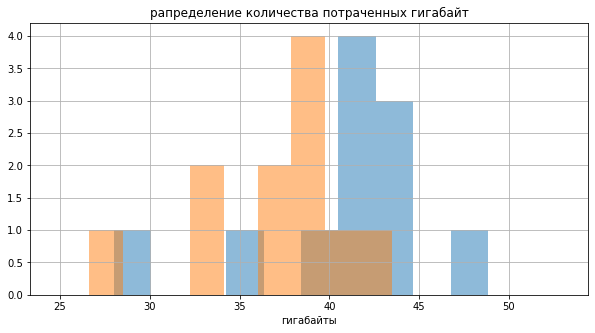

In [49]:
# Гистограмма для количества потраченных гигабайт для тарифов «Смарт» и «Ультра»
histogram(data_smart_mean['gb_used'], 'гигабайты', 'рапределение количества потраченных гигабайт')
histogram(data_ultra_mean['gb_used'], 'гигабайты', 'рапределение количества потраченных гигабайт')

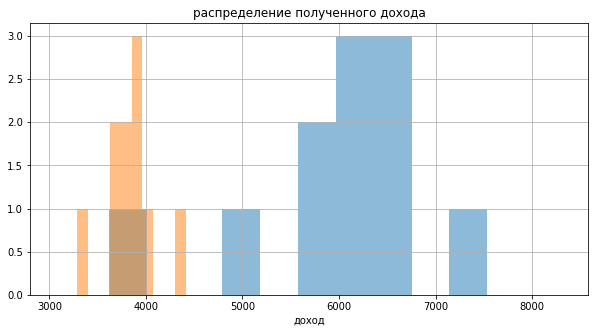

In [50]:
# Гистограмма для дохода для тарифов «Смарт» и «Ультра»
histogram(data_smart_mean['income'], 'доход', 'распределение полученного дохода')
histogram(data_ultra_mean['income'], 'доход', 'распределение полученного дохода')

#### Вывод
В среднем больше разговаривают и посылают сообщения абоненты тарифа «Ультра», абоненты тарифа «Смарт» больше тратят трафика в интернете и доход от данного тарифа больше. Дисперсии различаются. Среднее отклонение меньше среднего, значит значения распределены равномерно. 

### Шаг 4. Проверка гипотез <a id='section7'></a>

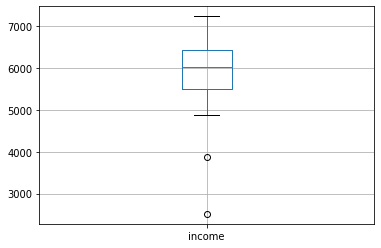

In [57]:
# Чтобы очистить данные от редких и выбивающихся значений
# Строим диаграммы размаха для значений дохода для тарифа "Смарт"
data_smart_mean.boxplot('income');

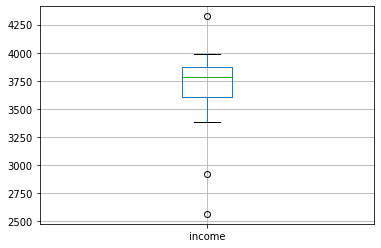

In [58]:
# И тарифа "Ультра"
data_ultra_mean.boxplot('income');

In [59]:
# Находим границы распределения для дохода, вычитая из среднего значения выборки 1,5 стандартных отклонения
A_sm = mean_income_smart['income'] - standard_deviation_smart['income']*1.5
B_sm = mean_income_smart['income'] + standard_deviation_smart['income']*1.5
A_ul = mean_income_ultra['income'] - standard_deviation_ultra['income']*1.5
B_ul = mean_income_ultra['income'] + standard_deviation_ultra['income']*1.5
print('A_sm =', A_sm, 'B_sm =', B_sm)
print('A_ul =', A_ul, 'B_ul =', B_ul)

A_sm = 3694.4129938996352 B_sm = 7648.75367276703
A_ul = 2925.02334064679 B_ul = 4366.809992686543


In [60]:
# Делаем срез и формируем новые данные
data_smart_mean = data_smart_mean.query('@A_sm < income < @B_sm')
data_ultra_mean = data_ultra_mean.query('@A_ul < income < @B_ul')

Данные от компании "Мегалайн" представлены только выборкой по 500м абонентам. Чтобы проверить гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт» для всех пользователей, возьмем две выборки с выручкой по тарифам «Ультра» и «Смарт» и сравним их средние значения по доходу с учетом дисперсии. Данные выборки независимы между собой, так как в этих группах разные абоненты, распределены нормально, поэтому применим статистический тест t-тест, используя метод scipy.stats.ttest_ind (array1, array2, equal_var) для двух выборок.

In [61]:
# Имеем 2 выборки. Проверим гипотезу о равенстве их средних и сформулируем гипотезы так: 
# Нулевая гипотеза H0 = средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
# Альтернативная H1 = средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
# equal_var = False, так как дисперсии выборок не равны
# Критический уровень статистической значимости 0.05
alpha = 0.05

results = st.ttest_ind(data_smart_mean['income'], data_ultra_mean['income'], equal_var = False)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  9.124134044309008e-06
Отвергаем нулевую гипотезу


<a id='section8'></a>

In [62]:
# Выделим среди абонентов жителей Москвы и сравним по выручке с другими городами
data_full['city'].value_counts()

Москва             611
Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
                  ... 
Нижневартовск        6
Сургут               6
Кемерово             5
Химки                5
Иваново              2
Name: city, Length: 76, dtype: int64

In [63]:
# Разбиваем на категории
data_full['city_category'] = data_full['city'].where(data_full['city'] == 'Москва', 'другие')
data_full['city_category'].value_counts()

другие    2603
Москва     611
Name: city_category, dtype: int64

In [64]:
# Формируем таблицу со среднем доходом по месяцам для абонентов Москвы
data_moscow_mean = (
    data_full
    .query('city_category == "Москва"')
    .pivot_table(index='month', values='income', aggfunc='mean')
    .astype('int')
)
data_moscow_mean

,income
month,
1,3975
2,3910
3,5739
4,4934
5,5012
6,4977
7,5107
8,5761
9,5428


In [65]:
# Формируем таблицу со среднем доходом по месяцам для абонентов других городов
data_other_mean = (
    data_full
    .query('city_category == "другие"')
    .pivot_table(index='month', values='income', aggfunc='mean')
    .astype('int')
)
data_other_mean

,income
month,
1,2195
2,3533
3,4911
4,4275
5,5358
6,5224
7,5490
8,5581
9,5536


In [66]:
# Находим дисперсии для дохода для абонентов из Москвы и других городов
variance_moscow = np.var(data_moscow_mean, ddof=1)
variance_other = np.var(data_other_mean, ddof=1)
print(variance_moscow)
variance_other

income    422293.840909
dtype: float64


income    1387242.0
dtype: float64

In [67]:
# Смотрим статистические данные полученной таблицы для абонентов других городов
data_other_mean.describe()

,income
count,12.000000
mean,5024.000000
std,1177.812379
min,2195.000000
25%,4752.000000
50%,5424.000000
75%,5646.000000
max,6500.000000


In [68]:
# Смотрим статистические данные полученной таблицы для абонентов Москвы
data_moscow_mean.describe()

,income
count,12.000000
mean,5142.750000
std,649.841397
min,3910.000000
25%,4966.250000
50%,5230.000000
75%,5634.000000
max,5918.000000


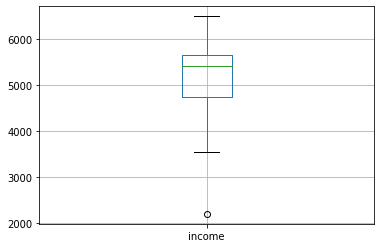

In [69]:
# Чтобы очистить данные от редких и выбивающихся значений
# Строим диаграммы размаха для значений дохода для абонентов других городов
data_other_mean.boxplot('income');

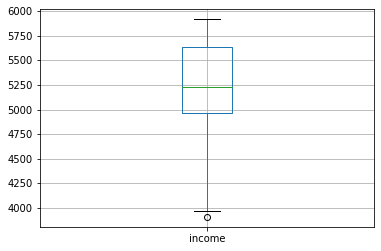

In [70]:
# И абонентов города Москвы
data_moscow_mean.boxplot('income');

In [71]:
# Находим границы распределения для дохода, вычитая из среднего значения выборки 1,5 стандартных отклонения
A_oth = data_other_mean['income'].describe()['mean'] - data_other_mean['income'].describe()['std']*1.5
B_oth = data_other_mean['income'].describe()['mean'] + data_other_mean['income'].describe()['std']*1.5
A_mos = data_moscow_mean['income'].describe()['mean'] - data_moscow_mean['income'].describe()['std']*1.5
B_mos = data_moscow_mean['income'].describe()['mean'] + data_moscow_mean['income'].describe()['std']*1.5
print('A_oth =', A_oth, 'B_oth =', B_oth)
print('A_mos =', A_mos, 'B_mos =', B_mos)

A_oth = 3257.281431580004 B_oth = 6790.718568419996
A_mos = 4167.9879048991215 B_mos = 6117.5120951008785


In [72]:
# Делаем срез и формируем новые данные
data_other_mean = data_other_mean.query('@A_oth < income < @B_oth')
data_moscow_mean = data_moscow_mean.query('@A_mos < income < @B_mos')

Данные от компании "Мегалайн" представлены только выборкой по 500м абонентам. Чтобы проверить гипотезу о равенстве средней выручки пользователей из Москвы и из других регионов для всех пользователей, так же возьмем две выборки с выручкой по Москве и другим городам и сравним их средние значения с учетом дисперсии. Данные выборки независимы между собой, так как в этих группах разные абоненты, распределены нормально, поэтому применим статистический тест t-тест, используя метод scipy.stats.ttest_ind (array1, array2, equal_var) для двух выборок.

In [73]:
# Имеем 2 выборки. Проверим гипотезу о равенстве их средних и сформулируем гипотезы так: 
# H0 = средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
# H1 = средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
# equal_var = False, так как дисперсии выборок не равны
# Критический уровень статистической значимости 0.05
alpha = 0.05

results = st.ttest_ind(data_other_mean['income'], data_moscow_mean['income'], equal_var = False)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
      print("Отвергаем нулевую гипотезу")
else:
      print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.7115253904054472
Не получилось отвергнуть нулевую гипотезу


#### Вывод
Получили, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, а средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

### Шаг 5. Общий вывод <a id='section9'></a>

* Проанализированы данные федерального оператора сотовой связи «Мегалайн» и два тарифных плана: «Смарт» и «Ультра».
* Таблицы с информацией о пользователях, звонках, сообщениях, интернет-сессиях и тарифах соединены в одну.
Заполнены пропущенные значения, которые образовались при слиянии таблиц.
* В таблицах с информацией о звонках, сообщениях и интернет-сессиях значения в столбце с датой переводены в тип даты.
Так как в тарифах "Мегалайн" засчитывается целая минута, если пользователь проговорил всего 1 секунду, то значения в столбце с количеством минут округлили вверх и перевели в целые числа, кроме нулевых значений, которые являются пропущенными звонками и не учитываются при индексации. Так как в тарифах "Мегалайн" засчитывается целый мегабайт, то значения в столбце с количеством потраченных мегабайт будем округлили вверх, пересчитали в гигабайты и перевели в целые числа. Значений в столбце с сообщениями перевели в целочисленный тип и переименовали столбец в 'messages'. В таблице с тарифами переименовали столбец в 'tariff'. Значения в столбце с количеством бесплатных мегабайтов будем перевели в гигабайты и переименовали в 'gb_per_month_included'.
* Так же была посчитана помесячная выручка с каждого пользователя. 
В среднем больше разговаривают и посылают сообщения абоненты тарифа "Ультра", абоненты тарифа "Смарт" больше тратят трафика в интернете и доход от данного тарифа больше. 
* Посчитано среднее количество, дисперсия и стандартное отклонение для данных по звонкам, сообщениям, гигабайтам и доходу. Построены гистограммы и диаграммы по месяцам.
* Данные очищены от редких и выбивающихся значений.
* Проверены гипотезы, подтвердили, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, а средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
* Получили, что средняя выручка по тарифу "Смарт" больше, делаем вывод, что даннный тариф выгоднее для компании "Мегалайн"